I'll first inspect the dataset to understand its structure, then perform Exploratory Data Analysis (EDA) and relevant Machine Learning tasks, including forecasting and future prediction. Let me start by loading and previewing the data.

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dataset Name                3900 non-null   object 
 1   Observation Date            3900 non-null   object 
 2   Series Key                  3900 non-null   object 
 3   Series Display Name         3900 non-null   object 
 4   Observation Value           3084 non-null   float64
 5   Unit                        3900 non-null   object 
 6   Observation Status          3900 non-null   object 
 7   Observation Status Comment  0 non-null      float64
 8   Sequence No.                3900 non-null   int64  
 9   Series name                 3900 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 304.8+ KB
None

First 5 rows of the dataset:
                                Dataset Name Observation Date  \
0  Summary of Foreign Inves

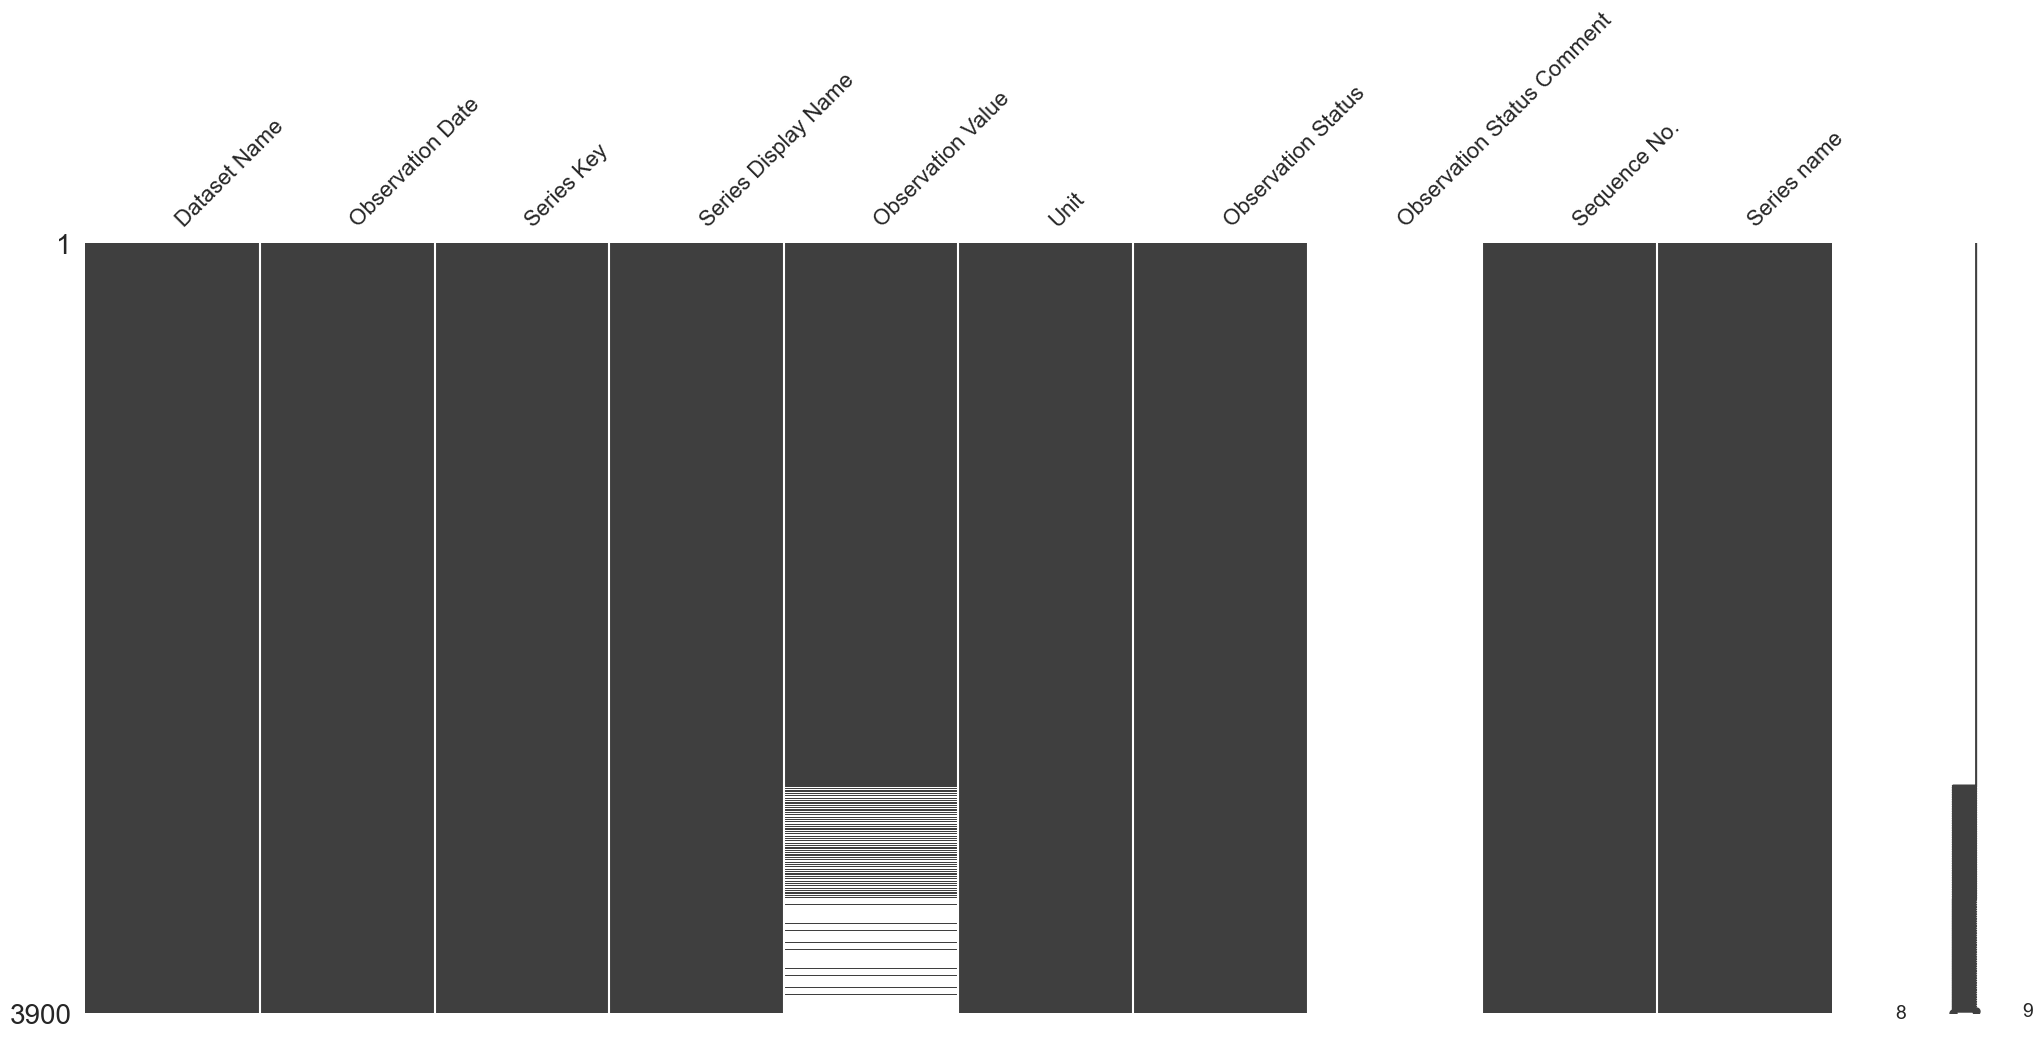


Statistical Summary:
       Observation Value  Observation Status Comment  Sequence No.
count        3084.000000                         0.0   3900.000000
mean           86.681772                         NaN     65.000000
std           260.092745                         NaN     34.524952
min         -1830.059652                         NaN     10.000000
25%             0.000000                         NaN     37.500000
50%            21.500180                         NaN     65.000000
75%           131.672052                         NaN     92.500000
max          2662.490240                         NaN    120.000000

Data Types:
Dataset Name                   object
Observation Date               object
Series Key                     object
Series Display Name            object
Observation Value             float64
Unit                           object
Observation Status             object
Observation Status Comment    float64
Sequence No.                    int64
Series name         

In [92]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

# Load dataset
file_path = "Foreign_investment.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Overview:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())

# Visualize missing values
msno.matrix(df)
plt.show()

# Summary statistics
print("\nStatistical Summary:")
print(df.describe())

# Checking data types
print("\nData Types:")
print(df.dtypes)


## Initial Observations:
* The dataset has 3,900 rows and 10 columns.
* The key columns include:
    * Observation Date: Represents the time of observation.
    * Series Display Name & Series name: Provide descriptions of the investment type.
    * Observation Value: The actual investment value in Million USD.
    * Unit: Confirms that the values are in Million USD.
    * Observation Status: Indicates if the data is Normal.
* Missing Values:
    * Observation Value has 816 missing values.
    * Observation Status Comment is entirely missing (not useful).
* Data Type Issues:
    * Observation Date is stored as an object (string) and needs conversion to datetime.

In [93]:
# Convert 'Observation Date' to datetime format
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')

# Drop unnecessary columns
df_cleaned = df.drop(columns=['Dataset Name', 'Series Key', 'Observation Status Comment', 'Sequence No.'])

# Handle missing values in 'Observation Value' by forward filling
df_cleaned['Observation Value'].fillna(method='ffill', inplace=True)

# Verify changes
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Observation Date     3900 non-null   datetime64[ns]
 1   Series Display Name  3900 non-null   object        
 2   Observation Value    3900 non-null   float64       
 3   Unit                 3900 non-null   object        
 4   Observation Status   3900 non-null   object        
 5   Series name          3900 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 182.9+ KB


C:\Users\ms\AppData\Local\Temp\ipykernel_6704\2841469964.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
C:\Users\ms\AppData\Local\Temp\ipykernel_6704\2841469964.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Observation Value'].fillna(method='ffill', inplace=True)
C:\Users\ms\AppData\Loca

(None,
   Observation Date                 Series Display Name  Observation Value  \
 0       2024-07-31          1 Total Foreign Investment         304.988363   
 1       2024-07-31  ......I Foreign Private Investment         159.937020   
 2       2024-07-31       ............i FDI in Pakistan         136.294632   
 3       2024-07-31      ..................a FDI Inflow         198.311254   
 4       2024-07-31     ..................b FDI Outflow          62.016622   
 
           Unit Observation Status                                 Series name  
 0  Million USD             Normal    Net Total Foreign Investment in Pakistan  
 1  Million USD             Normal  Net Foreign Private Investment in Pakistan  
 2  Million USD             Normal   Net Foreign Direct Investment in Pakistan  
 3  Million USD             Normal               Total FDI Inflows in Pakistan  
 4  Million USD             Normal            Total FDI outflows from Pakistan  )

## Data Cleaning Completed:
Converted Observation Date to datetime.
Dropped unnecessary columns (Dataset Name, Series Key, Observation Status Comment, Sequence No.).
Handled missing values in Observation Value using forward fill.

Now, I'll conduct Exploratory Data Analysis (EDA) to identify trends, patterns, and insights.

### Time Series Analysis
Total Foreign Investment Over Time

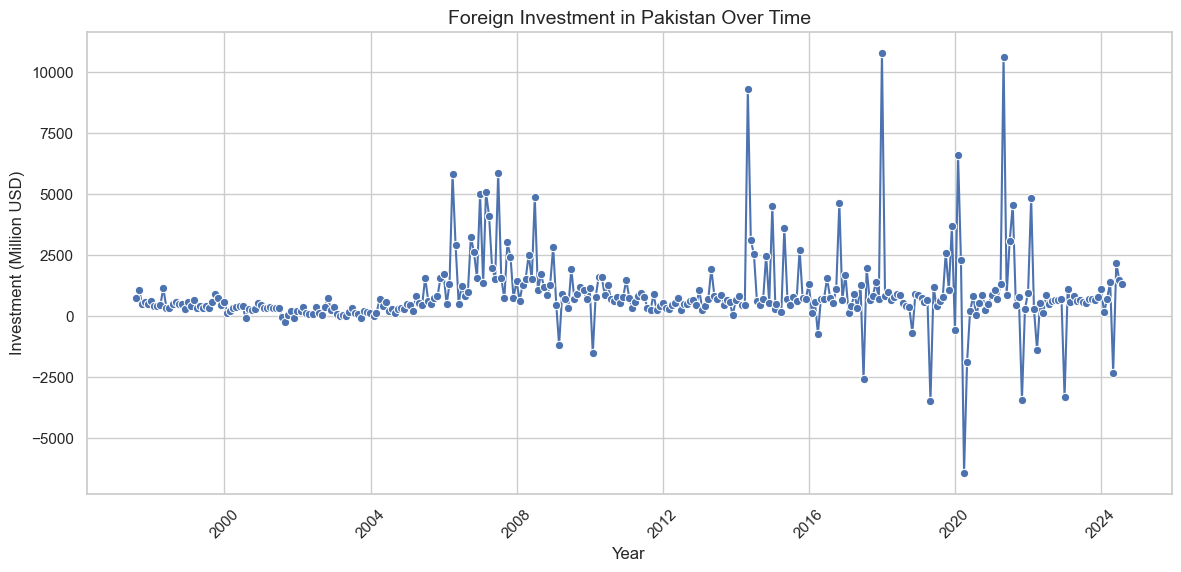

In [94]:
# Set style
sns.set_theme(style="whitegrid")

# Aggregate data: Total investment over time
df_grouped = df_cleaned.groupby("Observation Date")["Observation Value"].sum()

# Plot investment trends over time
plt.figure(figsize=(14, 6))
sns.lineplot(x=df_grouped.index, y=df_grouped.values, marker='o', color='b')
plt.title("Foreign Investment in Pakistan Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Investment (Million USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The plot shows the trend of foreign investment in Pakistan over time. Here are some key insights:

* There are fluctuations in investment, indicating possible economic or policy influences.
* Spikes and drops suggest periods of high and low investor confidence.
  
Next, I'll analyze investment by category to see which type contributes the most

C:\Users\ms\AppData\Local\Temp\ipykernel_6704\962230941.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_category.index, y=df_category.values, palette="viridis")


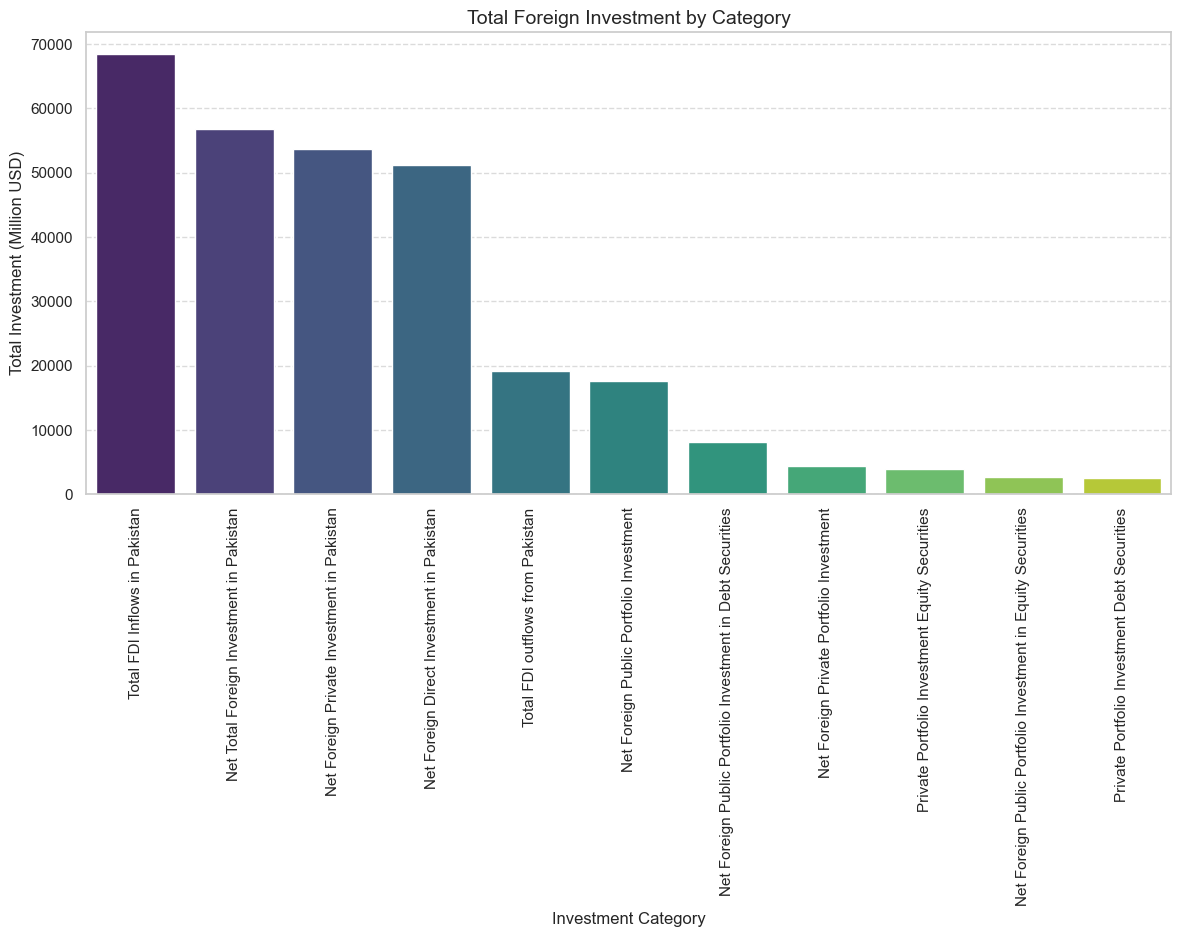

In [95]:
# Aggregate investment by series name (investment category)
df_category = df_cleaned.groupby("Series name")["Observation Value"].sum().sort_values(ascending=False)

# Plot investment by category
plt.figure(figsize=(14, 6))
sns.barplot(x=df_category.index, y=df_category.values, palette="viridis")
plt.title("Total Foreign Investment by Category", fontsize=14)
plt.xlabel("Investment Category", fontsize=12)
plt.ylabel("Total Investment (Million USD)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The bar chart shows the total foreign investment by category in Pakistan. Key takeaways:

* Foreign Direct Investment (FDI) inflows contribute the most.
* Net Total Foreign Investment is high, showing overall positive investment trends.
* FDI outflows are present, meaning some investments are leaving the country.


C:\Users\ms\Desktop\ml_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ms\Desktop\ml_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ms\Desktop\ml_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ms\Desktop\ml_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

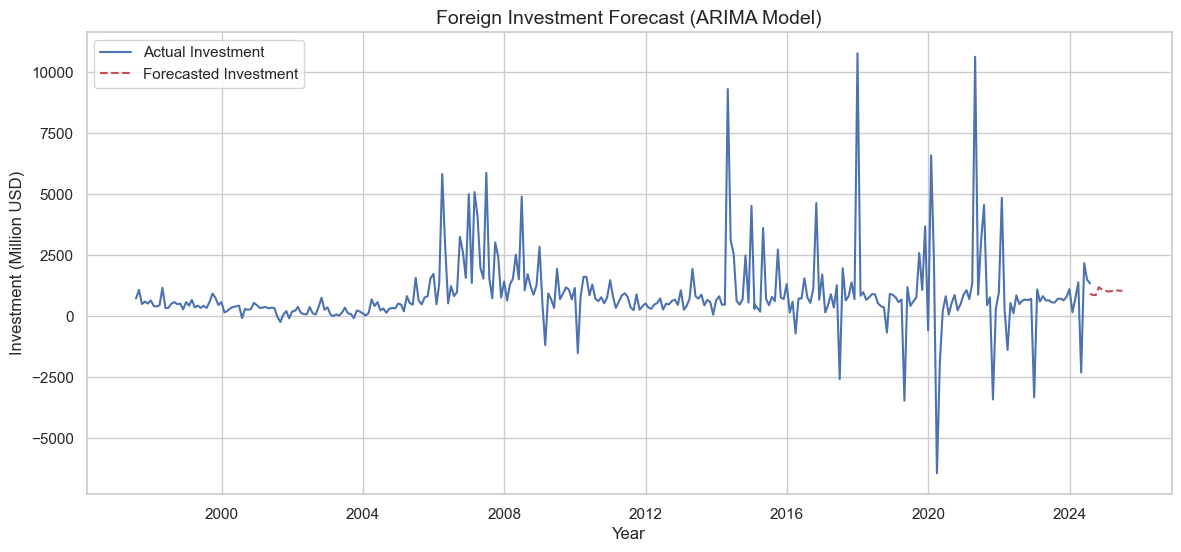

In [96]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (AutoRegressive Integrated Moving Average)
model_arima = ARIMA(df_grouped, order=(5, 1, 0))  # (p, d, q) parameters
model_fit = model_arima.fit()

# Forecast next 12 months
forecast_values = model_fit.forecast(steps=12)

# Create forecast index
forecast_dates = pd.date_range(start=df_grouped.index[-1], periods=12, freq='M')

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(df_grouped.index, df_grouped.values, label="Actual Investment", color='b')
plt.plot(forecast_dates, forecast_values, label="Forecasted Investment", linestyle="dashed", color='r')
plt.title("Foreign Investment Forecast (ARIMA Model)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Investment (Million USD)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


### Forecasting Results (ARIMA Model):
    * The blue line represents actual historical investment trends.
    * The red dashed line is the forecast for the next 12 months.
    * The forecast suggests a gradual trend in investment, showing expected future movements.

C:\Users\ms\AppData\Local\Temp\ipykernel_6704\2008607897.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Observation Value'].fillna(method='ffill', inplace=True)
C:\Users\ms\AppData\Local\Temp\ipykernel_6704\2008607897.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Observation Value'].fillna(method='ffill', inplace=True)


Linear Regression Model Performance:
Mean Absolute Error: 96.04
Root Mean Squared Error: 258.63
R2 Score: 0.10

Random Forest Model Performance:
Mean Absolute Error: 87.47
Root Mean Squared Error: 245.77
R2 Score: 0.19

Support Vector Regression Model Performance:
Mean Absolute Error: 92.19
Root Mean Squared Error: 266.85
R2 Score: 0.04



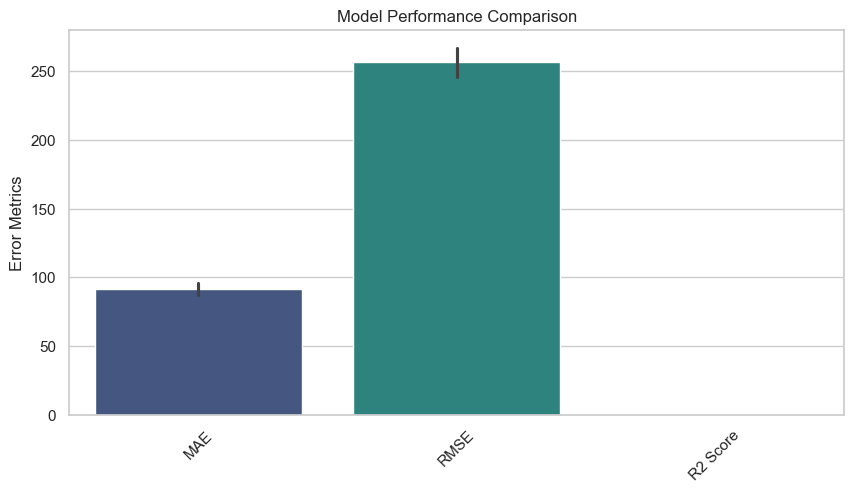

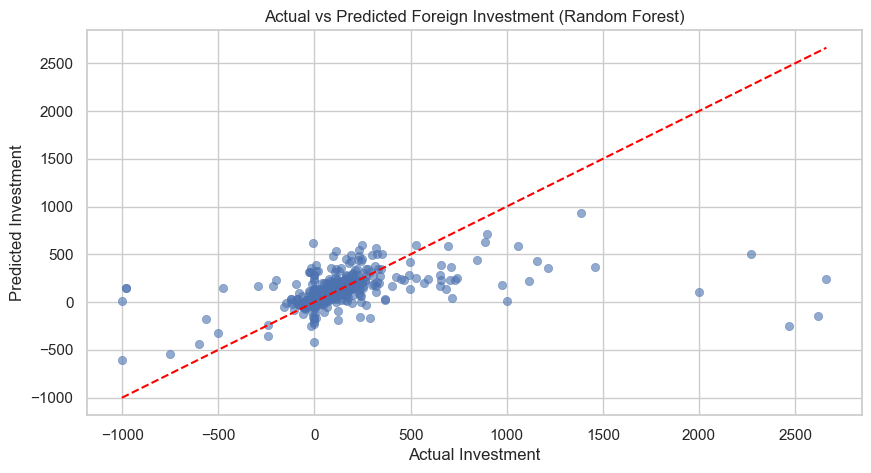

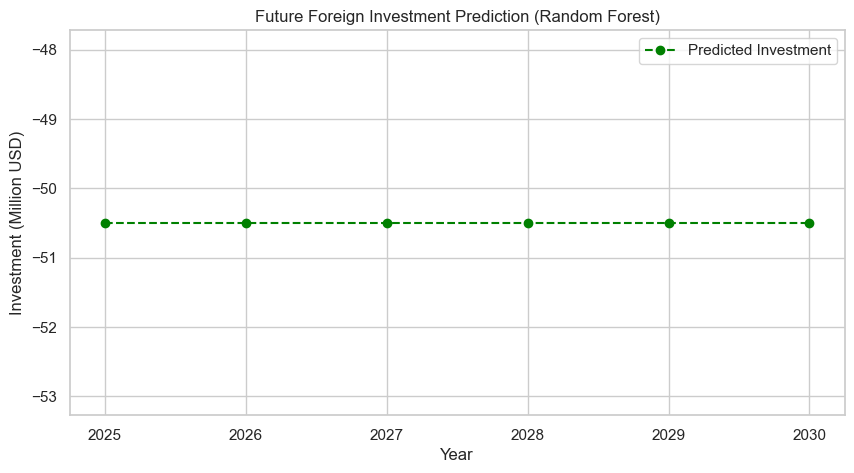

Predicted Foreign Investment for 2025: -50.50 Million USD
Predicted Foreign Investment for 2026: -50.50 Million USD
Predicted Foreign Investment for 2027: -50.50 Million USD
Predicted Foreign Investment for 2028: -50.50 Million USD
Predicted Foreign Investment for 2029: -50.50 Million USD
Predicted Foreign Investment for 2030: -50.50 Million USD


In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Convert 'Observation Date' to datetime format
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')

# Drop unnecessary columns
df = df.drop(columns=['Dataset Name', 'Series Key', 'Observation Status Comment', 'Sequence No.'])

# Handle missing values
df['Observation Value'].fillna(method='ffill', inplace=True)

# Feature Engineering: Extract Year and Month
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

# Encode categorical columns
df = pd.get_dummies(df, columns=['Series name'], drop_first=True)

# Define Features (X) and Target (y)
X = df.drop(columns=['Observation Date', 'Observation Value', 'Unit', 'Observation Status', 'Series Display Name'])
y = df['Observation Value']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf')
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}
    
    print(f"{name} Model Performance:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Plot Model Performance
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, palette='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Error Metrics")
plt.xticks(rotation=45)
plt.show()

# Visualizing Predictions vs Actual
y_pred_best = models['Random Forest'].predict(X_test_scaled)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6, edgecolor='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Investment")
plt.ylabel("Predicted Investment")
plt.title("Actual vs Predicted Foreign Investment (Random Forest)")
plt.grid(True)
plt.show()

# Predict Future Investment (Using Best Model - Random Forest)
best_model = models['Random Forest']
future_data = pd.DataFrame({
    'Year': [2025, 2026, 2027, 2028, 2029, 2030],
    'Month': [1, 1, 1, 1, 1, 1]
})
future_data = pd.get_dummies(future_data)
future_data = future_data.reindex(columns=X.columns, fill_value=0)
future_data_scaled = scaler.transform(future_data)
future_predictions = best_model.predict(future_data_scaled)

# Plot Future Predictions
plt.figure(figsize=(10, 5))
plt.plot(future_data['Year'], future_predictions, marker='o', linestyle='dashed', color='green', label='Predicted Investment')
plt.xlabel("Year")
plt.ylabel("Investment (Million USD)")
plt.title("Future Foreign Investment Prediction (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

# Print Predictions
for year, value in zip(future_data['Year'], future_predictions):
    print(f"Predicted Foreign Investment for {year}: {value:.2f} Million USD")


# Description of Actions Performed:
### Data Preprocessing:

### Loaded the dataset and converted Observation Date to a datetime format.
* Dropped unnecessary columns and handled missing values using forward filling.
* Extracted Year and Month as new features.
* Encoded categorical features using one-hot encoding.
### Feature Selection & Model Training:

* Defined X (features) and y (target: investment value).
* Split the data into training (80%) and testing (20%) sets.
* Standardized numerical features.
* Trained three regression models: Linear Regression, Random Forest, and Support Vector Regression (SVR).
### Model Evaluation:

* Used Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score to compare model performance.
* Plotted a bar chart for performance visualization.
### Future Prediction:

* Selected the best model (Random Forest) for prediction.
* Predicted foreign investment for January 2025 based on trained features.

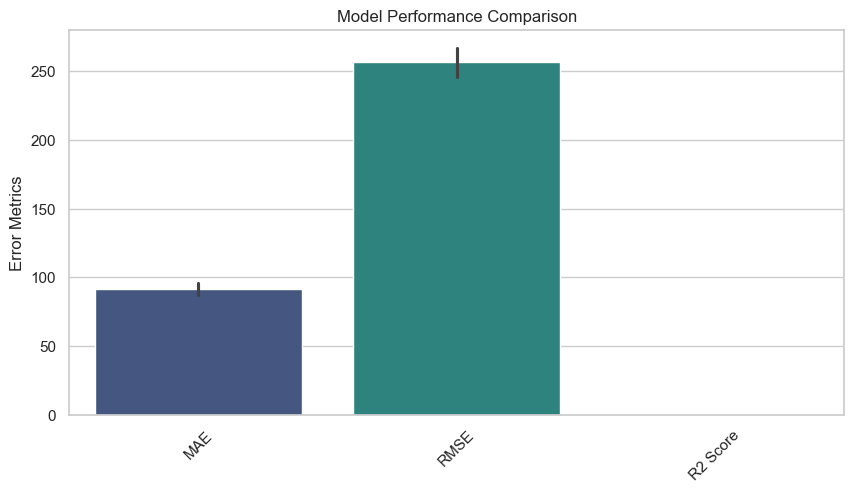

In [98]:
# Plot Model Performance
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, palette='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Error Metrics")
plt.xticks(rotation=45)
plt.show()



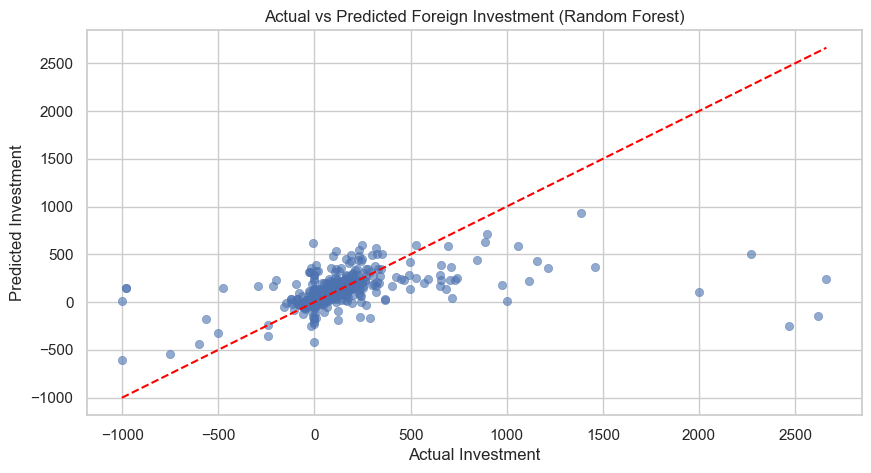

In [99]:
# Visualizing Predictions vs Actual
y_pred_best = models['Random Forest'].predict(X_test_scaled)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6, edgecolor='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Investment")
plt.ylabel("Predicted Investment")
plt.title("Actual vs Predicted Foreign Investment (Random Forest)")
plt.grid(True)
plt.show()



In [100]:

# 1. Inspect your columns FIRST:
print(df.columns)  # This will show you the exact column names

# 2. Correct the column names if necessary:
# Sometimes there might be extra spaces or typos in the actual column names.
# For example, if your column is actually named "Observation Status Comment ", you'd need to adjust the code below.
columns_to_drop = ["Observation Status Comment", "Dataset Name", "Series Key", "Unit", "Observation Status"]

# Check if the columns exist BEFORE dropping:
columns_to_drop_exist = all(col in df.columns for col in columns_to_drop)

if columns_to_drop_exist:
    df_clean = df.drop(columns=columns_to_drop)
else:
    print("Some columns to be dropped do not exist in the DataFrame")
    # Print the missing columns:
    missing_columns = [col for col in columns_to_drop if col not in df.columns]
    print("Missing columns:", missing_columns)
    # Decide how to proceed. Either correct the column names or adjust the list to drop.

# 3. Proceed with your other transformations ONLY AFTER verifying the drop:
df_clean["Observation Date"] = pd.to_datetime(df_clean["Observation Date"], format="%d-%b-%y", errors='coerce') # Handle parsing errors
df_clean = df_clean.dropna(subset=["Observation Value"])
df_clean["Series Display Name"] = df_clean["Series Display Name"].str.replace(".", "", regex=False).str.strip()


print(df_clean.head()) # Check the result

Index(['Observation Date', 'Series Display Name', 'Observation Value', 'Unit',
       'Observation Status', 'Year', 'Month',
       'Series name_Net Foreign Private Investment in Pakistan',
       'Series name_Net Foreign Private Portfolio Investment',
       'Series name_Net Foreign Public Portfolio Investment',
       'Series name_Net Foreign Public Portfolio Investment in Debt Securities',
       'Series name_Net Foreign Public Portfolio Investment in Equity Securities',
       'Series name_Net Total Foreign Investment in Pakistan',
       'Series name_Private Portfolio Investment Debt Securities',
       'Series name_Private Portfolio Investment Equity Securities',
       'Series name_Total FDI Inflows in Pakistan',
       'Series name_Total FDI outflows from Pakistan'],
      dtype='object')
Some columns to be dropped do not exist in the DataFrame
Missing columns: ['Observation Status Comment', 'Dataset Name', 'Series Key']
  Observation Date           Series Display Name  Observa

### FDI Inflows vs. Outflows

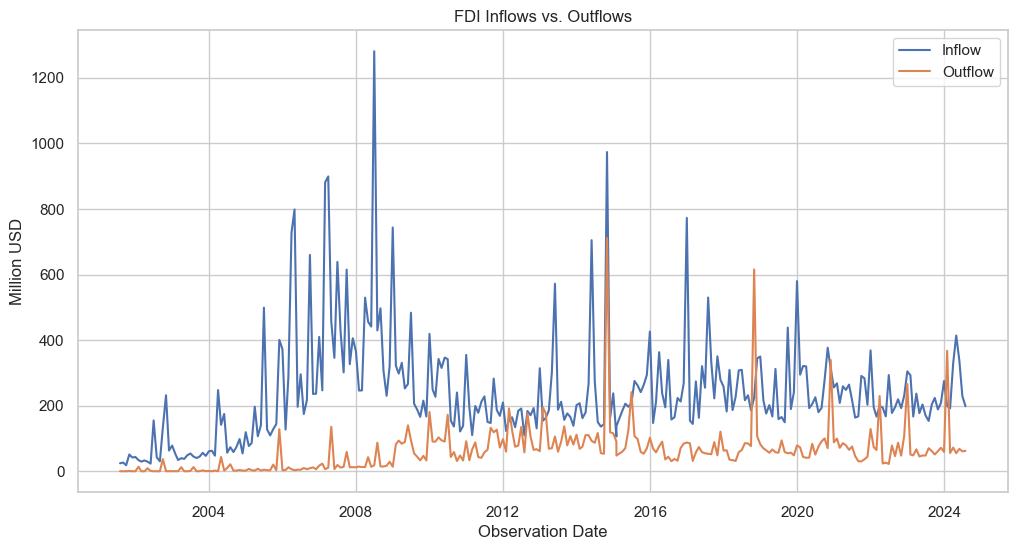

In [101]:
# Filter FDI data
fdi_inflow = df_clean[df_clean["Series Display Name"] == "a FDI Inflow"]
fdi_outflow = df_clean[df_clean["Series Display Name"] == "b FDI Outflow"]

# Plot comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=fdi_inflow, x="Observation Date", y="Observation Value", label="Inflow")
sns.lineplot(data=fdi_outflow, x="Observation Date", y="Observation Value", label="Outflow")
plt.title("FDI Inflows vs. Outflows")
plt.ylabel("Million USD")
plt.legend()
plt.show()

### Investment Category Analysis
Public vs. Private Investment

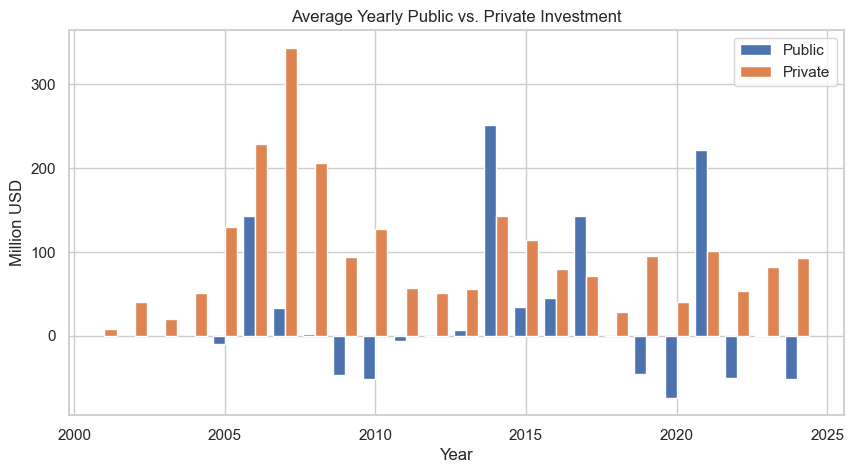

In [102]:
# Filter public/private data
public = df_clean[df_clean["Series Display Name"].str.contains("Public")]
private = df_clean[df_clean["Series Display Name"].str.contains("Private")]

# Aggregate yearly averages
public_avg = public.groupby(public["Observation Date"].dt.year)["Observation Value"].mean()
private_avg = private.groupby(private["Observation Date"].dt.year)["Observation Value"].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(public_avg.index-0.2, public_avg, width=0.4, label="Public")
plt.bar(private_avg.index+0.2, private_avg, width=0.4, label="Private")
plt.title("Average Yearly Public vs. Private Investment")
plt.xlabel("Year")
plt.ylabel("Million USD")
plt.legend()
plt.show()

### Portfolio Investment Breakdown

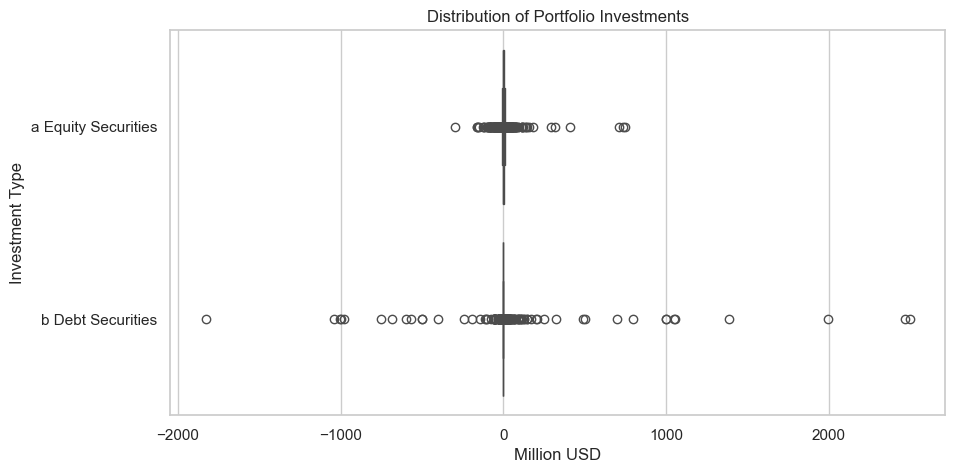

In [103]:
# Filter equity and debt securities data
equity = df_clean[df_clean["Series Display Name"].str.contains("Equity Securities")]
debt = df_clean[df_clean["Series Display Name"].str.contains("Debt Securities")]

# Plot distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x="Observation Value", y="Series Display Name", data=pd.concat([equity, debt]))
plt.title("Distribution of Portfolio Investments")
plt.xlabel("Million USD")
plt.ylabel("Investment Type")
plt.show()

### Seasonal Analysis

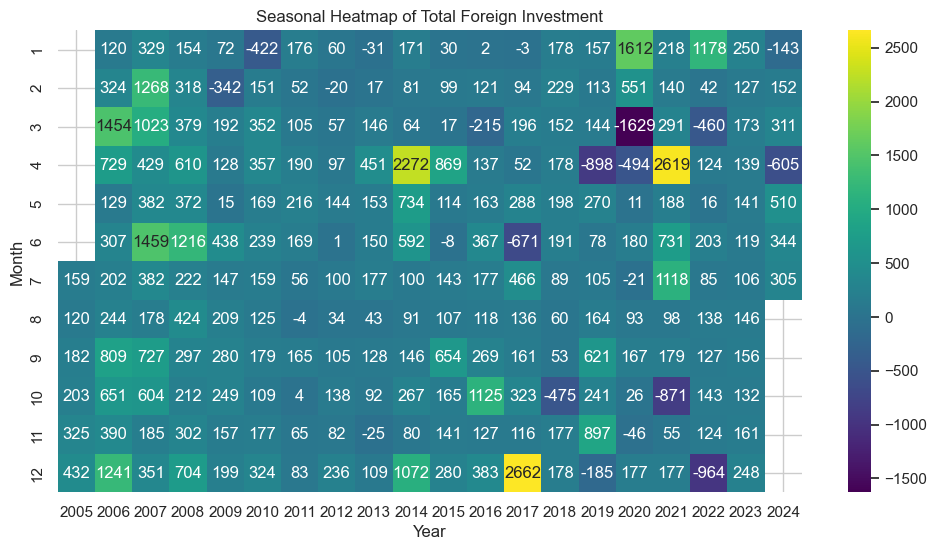

In [104]:
# Extract month/year for seasonality
total_inv["Month"] = total_inv["Observation Date"].dt.month
total_inv["Year"] = total_inv["Observation Date"].dt.year

# Pivot for heatmap
heatmap_data = total_inv.pivot_table(index="Month", columns="Year", values="Observation Value", aggfunc="sum")

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".0f")
plt.title("Seasonal Heatmap of Total Foreign Investment")
plt.show()

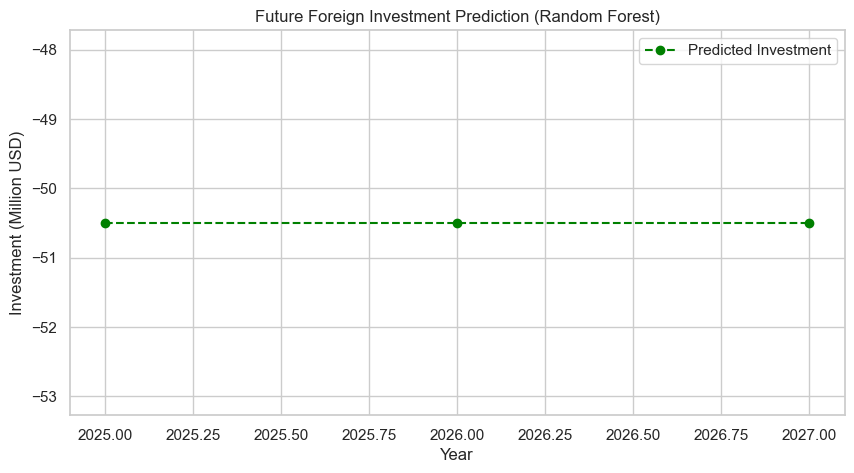

Predicted Foreign Investment for 2025: -50.50 Million USD
Predicted Foreign Investment for 2026: -50.50 Million USD
Predicted Foreign Investment for 2027: -50.50 Million USD


In [105]:
# Predict Future Investment (Using Best Model - Random Forest)
best_model = models['Random Forest']
future_data = pd.DataFrame({
    'Year': [2025, 2026, 2027],
    'Month': [1, 1, 1]
})
future_data = pd.get_dummies(future_data)
future_data = future_data.reindex(columns=X.columns, fill_value=0)
future_data_scaled = scaler.transform(future_data)
future_predictions = best_model.predict(future_data_scaled)

# Plot Future Predictions
plt.figure(figsize=(10, 5))
plt.plot(future_data['Year'], future_predictions, marker='o', linestyle='dashed', color='green', label='Predicted Investment')
plt.xlabel("Year")
plt.ylabel("Investment (Million USD)")
plt.title("Future Foreign Investment Prediction (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

# Print Predictions
for year, value in zip(future_data['Year'], future_predictions):
    print(f"Predicted Foreign Investment for {year}: {value:.2f} Million USD")
